In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)

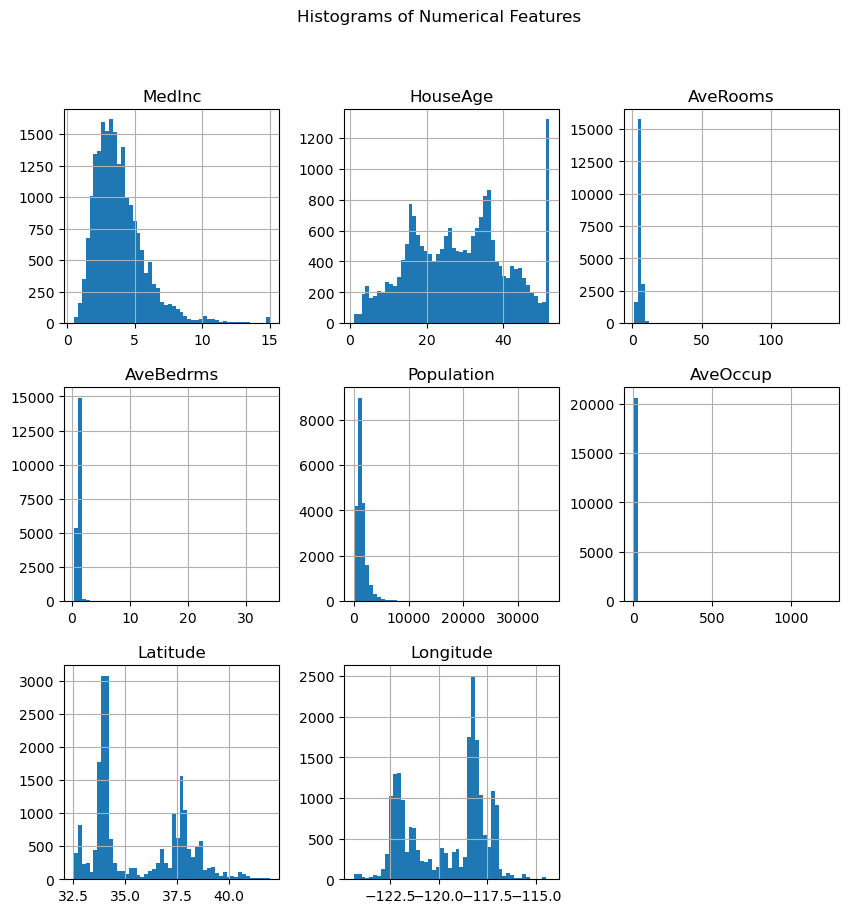

In [5]:
data.hist(bins=50, figsize=(10, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

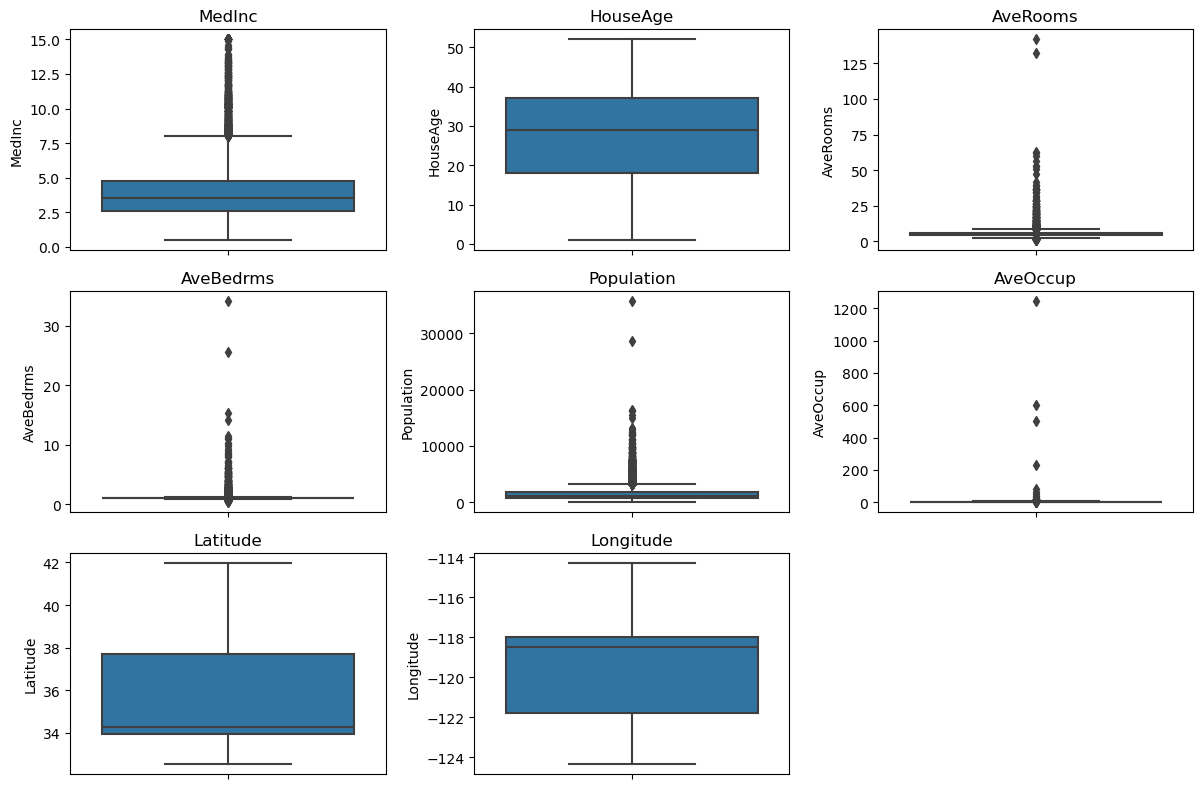

In [7]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [9]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_values = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers[column] = outlier_values.tolist()
    return outliers

outliers_dict = detect_outliers_iqr(data)
for feature, outliers in outliers_dict.items():
    print(f"{feature}: {len(outliers)} outliers found")

MedInc: 681 outliers found
HouseAge: 0 outliers found
AveRooms: 511 outliers found
AveBedrms: 1424 outliers found
Population: 1196 outliers found
AveOccup: 711 outliers found
Latitude: 0 outliers found
Longitude: 0 outliers found
